In [1]:
# https://github.com/datasci-w266/2022-fall-main/blob/master/materials/lesson_notebooks/lesson_4_BERT.ipynb

In [61]:
# import pandas module 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data = pd.read_csv("processed_questions.csv")

In [63]:
data.head(5)

,Unnamed: 0,Id,OwnerUserId,CreationDate,Score,Title,Body,highest_answer_score,num_answers,has_positive_answer
0,0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,12,4,True
1,1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,9,2,True
2,2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,4,3,True
3,3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,4,1,True
4,4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,8,7,True


In [64]:
data['Full_Text'] = data['Title'] + " " + data['Body']

In [65]:
data.head(5)

,Unnamed: 0,Id,OwnerUserId,CreationDate,Score,Title,Body,highest_answer_score,num_answers,has_positive_answer,Full_Text
0,0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,12,4,True,How can I find the full path to a font from it...
1,1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,9,2,True,Get a preview JPEG of a PDF on Windows? <p>I h...
2,2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,4,3,True,Continuous Integration System for a Python Cod...
3,3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,4,1,True,cx_Oracle: How do I iterate over a result set?...
4,4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,8,7,True,Using 'in' to match an attribute of Python obj...


In [66]:
def get_string_word_count(title):
    words = list(title.split(" "))
    return len(words)

In [67]:
data['Title_Word_Count'] = data.apply(lambda row: get_string_word_count(row['Title']), axis=1)

In [68]:
data['Body_Word_Count'] = data.apply(lambda row: get_string_word_count(row['Body']), axis=1)

In [69]:
data.head(3)

,Unnamed: 0,Id,OwnerUserId,CreationDate,Score,Title,Body,highest_answer_score,num_answers,has_positive_answer,Full_Text,Title_Word_Count,Body_Word_Count
0,0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,12,4,True,How can I find the full path to a font from it...,17,70
1,1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,9,2,True,Get a preview JPEG of a PDF on Windows? <p>I h...,9,38
2,2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,4,3,True,Continuous Integration System for a Python Cod...,7,102


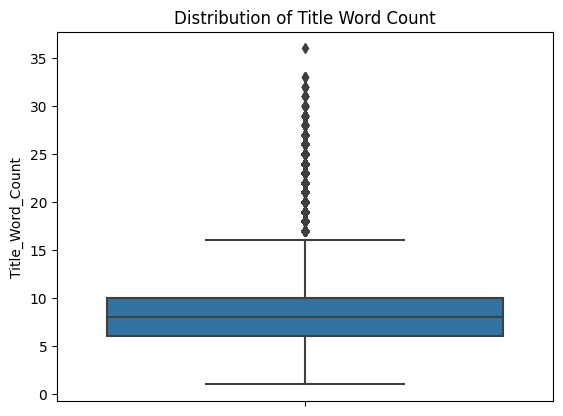

In [70]:
def summary_data(key, display_key=None):
    if display_key == None:
        display_key = key
    # boxplot of this data
    sns.boxplot(y=data[key]).set(title=f"Distribution of {display_key}")
    
summary_data('Title_Word_Count', 'Title Word Count')

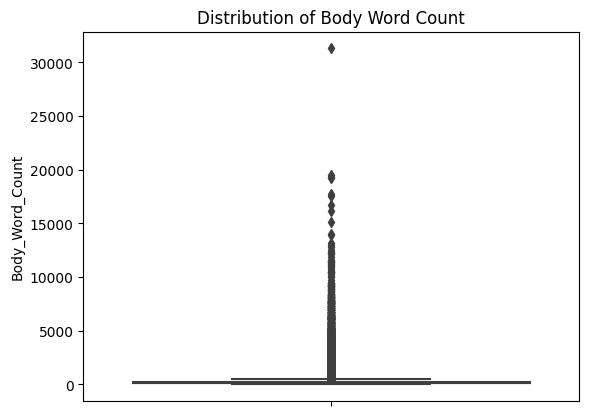

In [71]:
summary_data('Body_Word_Count', 'Body Word Count')

In [72]:
def plot_vs_target_var(key):
    sns.scatterplot(data=data, x=key, y='highest_answer_score')

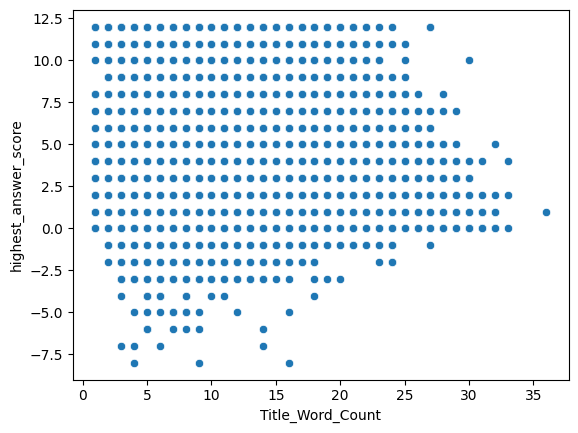

In [73]:
plot_vs_target_var("Title_Word_Count")

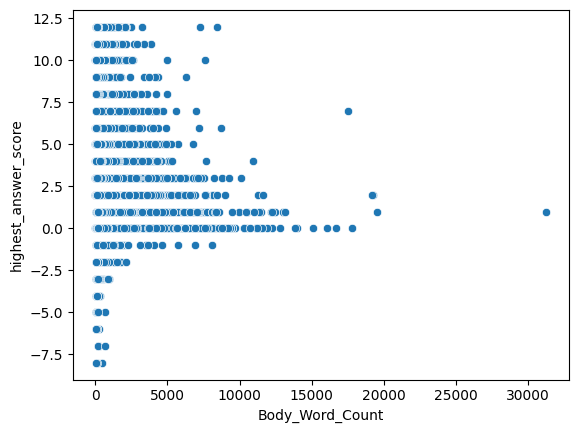

In [56]:
plot_vs_target_var("Body_Word_Count")

In [59]:
np.max(data['Title_Word_Count'])

36